In [1]:
import pandas as pd
import warnings

import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans

In [2]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
df = pd.read_csv("/bike.csv")

In [8]:
df.head()


,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
0,Wanna buy this bike so i gave basic informatio...,Everything,Never owned,NaN,1,3.0,1.0,3.0,1.0,4.0,NaN,NaN,NaN
1,This is simply amazing and exceptionally well ...,Everything,> 1 yr,< 5000 kms,5,5.0,5.0,5.0,5.0,NaN,5.0,NaN,NaN
2,"Battery life is good, I like this bike very mu...",Everything,< 3 months,< 5000 kms,5,4.0,4.0,5.0,3.0,NaN,4.0,NaN,NaN
3,I seen this bike on road. Very nice bike and g...,Everything,Never owned,NaN,5,5.0,5.0,5.0,5.0,NaN,5.0,NaN,NaN
4,I have a rv400 I have the bike for almost more...,Daily Commute,> 1 yr,5000-10000 kms,1,2.0,1.0,1.0,2.0,NaN,3.0,NaN,NaN


In [9]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review              769 non-null    object 
 1   Used it for         812 non-null    object 
 2   Owned for           812 non-null    object 
 3   Ridden for          640 non-null    object 
 4   rating              812 non-null    int64  
 5   Visual Appeal       711 non-null    float64
 6   Reliability         688 non-null    float64
 7   Performance         624 non-null    float64
 8   Service Experience  681 non-null    float64
 9   Extra Features      568 non-null    float64
 10  Comfort             202 non-null    float64
 11  Maintenance cost    88 non-null     float64
 12  Value for Money     84 non-null     float64
dtypes: float64(8), int64(1), object(4)
memory usage: 82.6+ KB


In [11]:
df.head(10)

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
0,Wanna buy this bike so i gave basic informatio...,Everything,Never owned,NaN,1,3.0,1.0,3.0,1.0,4.0,NaN,NaN,NaN
1,This is simply amazing and exceptionally well ...,Everything,> 1 yr,< 5000 kms,5,5.0,5.0,5.0,5.0,NaN,5.0,NaN,NaN
2,"Battery life is good, I like this bike very mu...",Everything,< 3 months,< 5000 kms,5,4.0,4.0,5.0,3.0,NaN,4.0,NaN,NaN
3,I seen this bike on road. Very nice bike and g...,Everything,Never owned,NaN,5,5.0,5.0,5.0,5.0,NaN,5.0,NaN,NaN
4,I have a rv400 I have the bike for almost more...,Daily Commute,> 1 yr,5000-10000 kms,1,2.0,1.0,1.0,2.0,NaN,3.0,NaN,NaN
5,Buying experience of Revolt 400 bike. It is us...,Leisure Rides,> 1 yr,> 15000 kms,3,1.0,5.0,1.0,1.0,NaN,3.0,NaN,NaN
6,"We'll, this bike will meet the interests of ma...",Leisure Rides,Never owned,NaN,5,4.0,4.0,4.0,4.0,4.0,NaN,5.0,NaN
7,"Buying experience is awesome, riding performan...",Daily Commute,6 months-1 yr,< 5000 kms,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Value for money. Really a thumbs up for the bi...,Everything,Never owned,NaN,5,5.0,5.0,5.0,5.0,5.0,NaN,5.0,NaN
9,"Please give protection to the battery, because...",Daily Commute,Never owned,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
for col in df.columns[1:].values:
    print(col,'\n\n' ,df[col].value_counts(), '\n\n\n')

Used it for 

 Daily Commute         581
Everything            154
Occasional Commute     52
Leisure Rides          17
Tours                   8
Name: Used it for, dtype: int64 



Owned for 

 < 3 months            211
> 1 yr                195
Never owned           171
6 months-1 yr         129
3-6 months            105
Occasional Commute      1
Name: Owned for, dtype: int64 



Ridden for 

 < 5000 kms         439
5000-10000 kms     133
> 15000 kms         37
10000-15000 kms     30
Never owned          1
Name: Ridden for, dtype: int64 



rating 

 5    323
1    232
4    146
3     65
2     46
Name: rating, dtype: int64 



Visual Appeal 

 5.0    284
4.0    195
3.0    106
1.0     88
2.0     38
Name: Visual Appeal, dtype: int64 



Reliability 

 5.0    228
1.0    172
4.0    147
3.0     90
2.0     51
Name: Reliability, dtype: int64 



Performance 

 5.0    218
4.0    172
1.0    100
3.0     84
2.0     50
Name: Performance, dtype: int64 



Service Experience 

 5.0    215
1.0    198


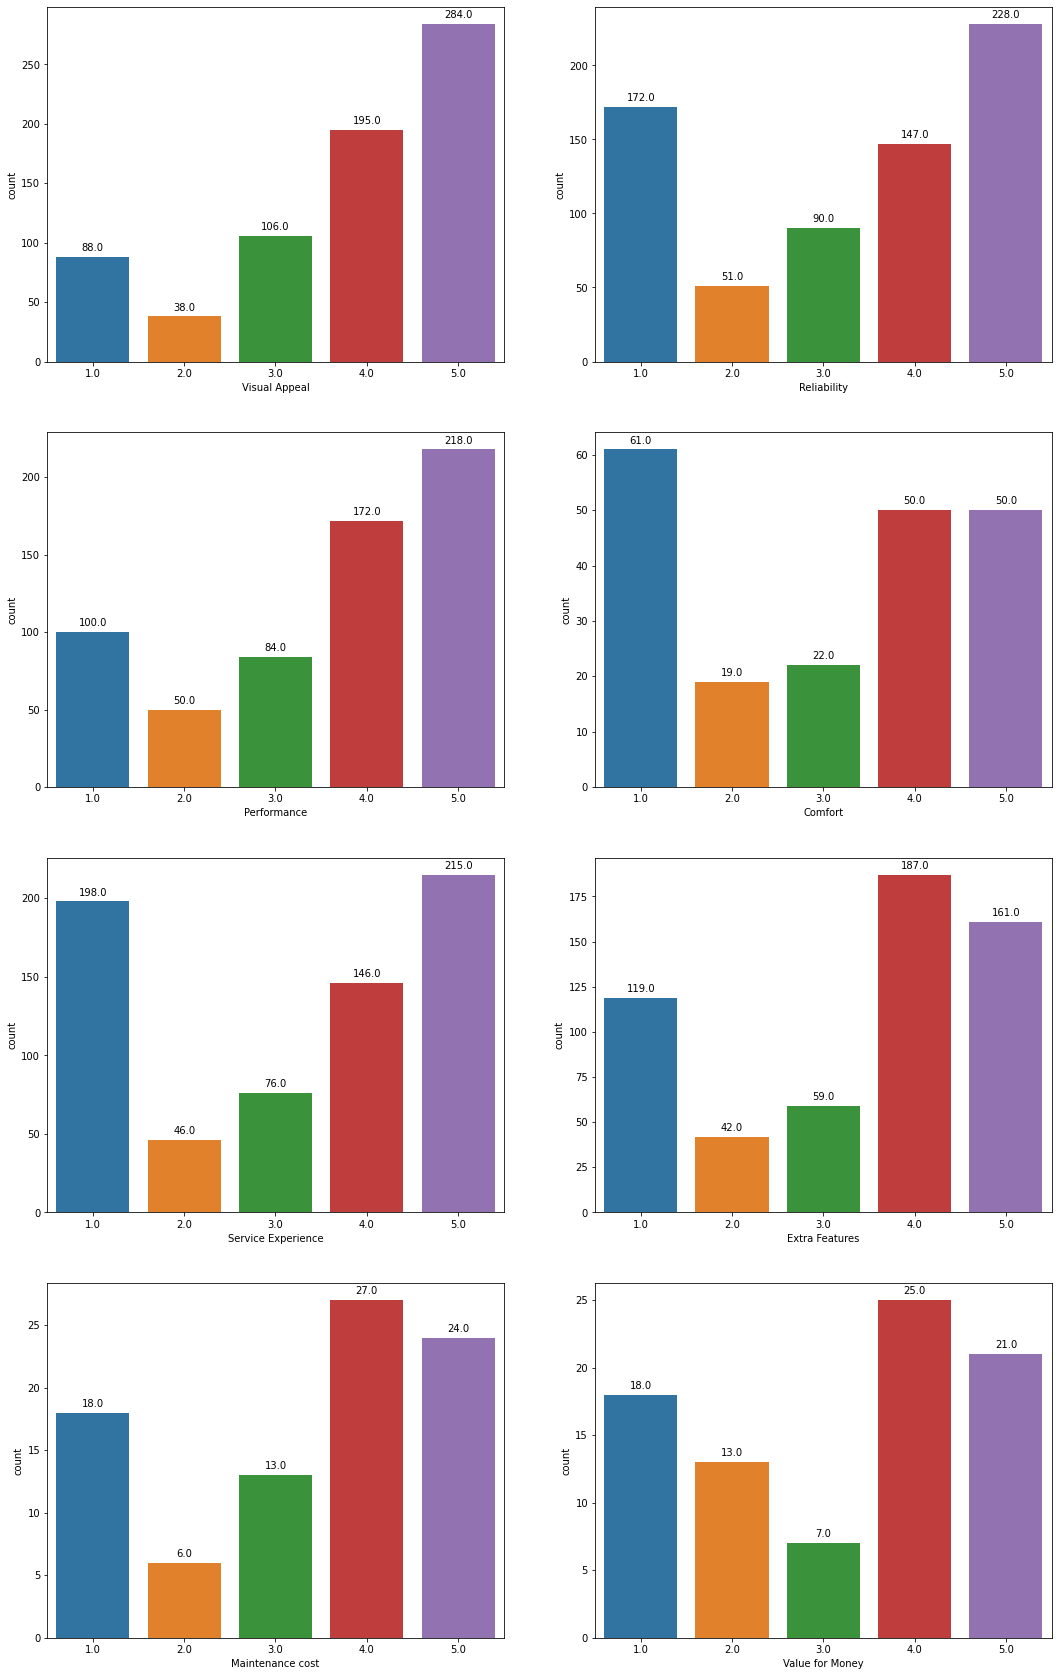

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 30))

splot = sns.countplot(data = df,x='Visual Appeal', ax=axes[0][0])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
        
splot = sns.countplot(data = df,x='Reliability', ax=axes[0][1])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
        
splot = sns.countplot(data = df,x='Performance', ax=axes[1][0])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
        
splot = sns.countplot(data = df,x='Comfort', ax=axes[1][1])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
        
splot = sns.countplot(data = df,x='Service Experience', ax=axes[2][0])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
        
splot = sns.countplot(data = df,x='Extra Features', ax=axes[2][1])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
        
splot = sns.countplot(data = df,x='Maintenance cost', ax=axes[3][0])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
        
splot = sns.countplot(data = df,x='Value for Money', ax=axes[3][1])
for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')

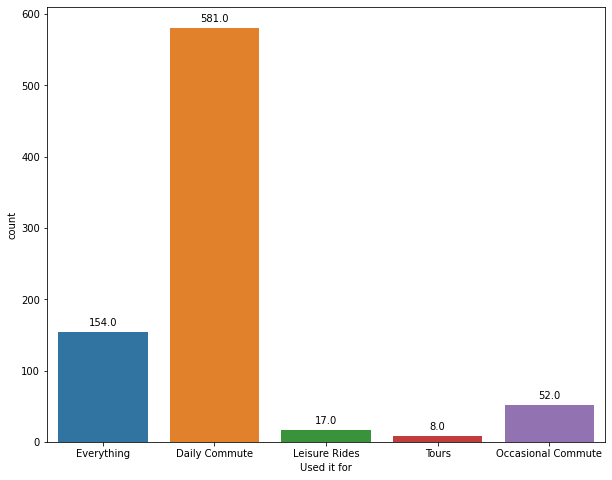

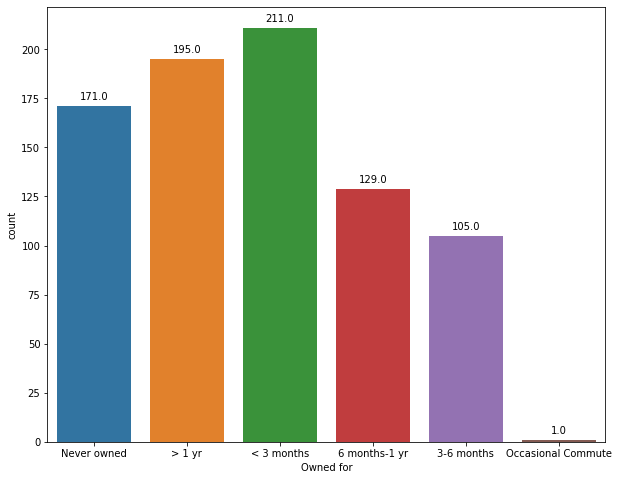

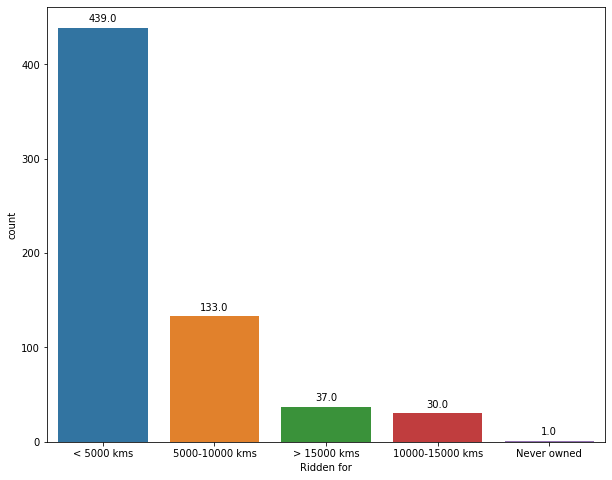

In [14]:
for col in df.columns[1:4].values:
    plt.figure(figsize=(10, 8))
    splot = sns.countplot(df[col])
    for p in splot.patches:
               splot.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               xytext = (0, 9), 
               textcoords = 'offset points')
    plt.show(block=False)

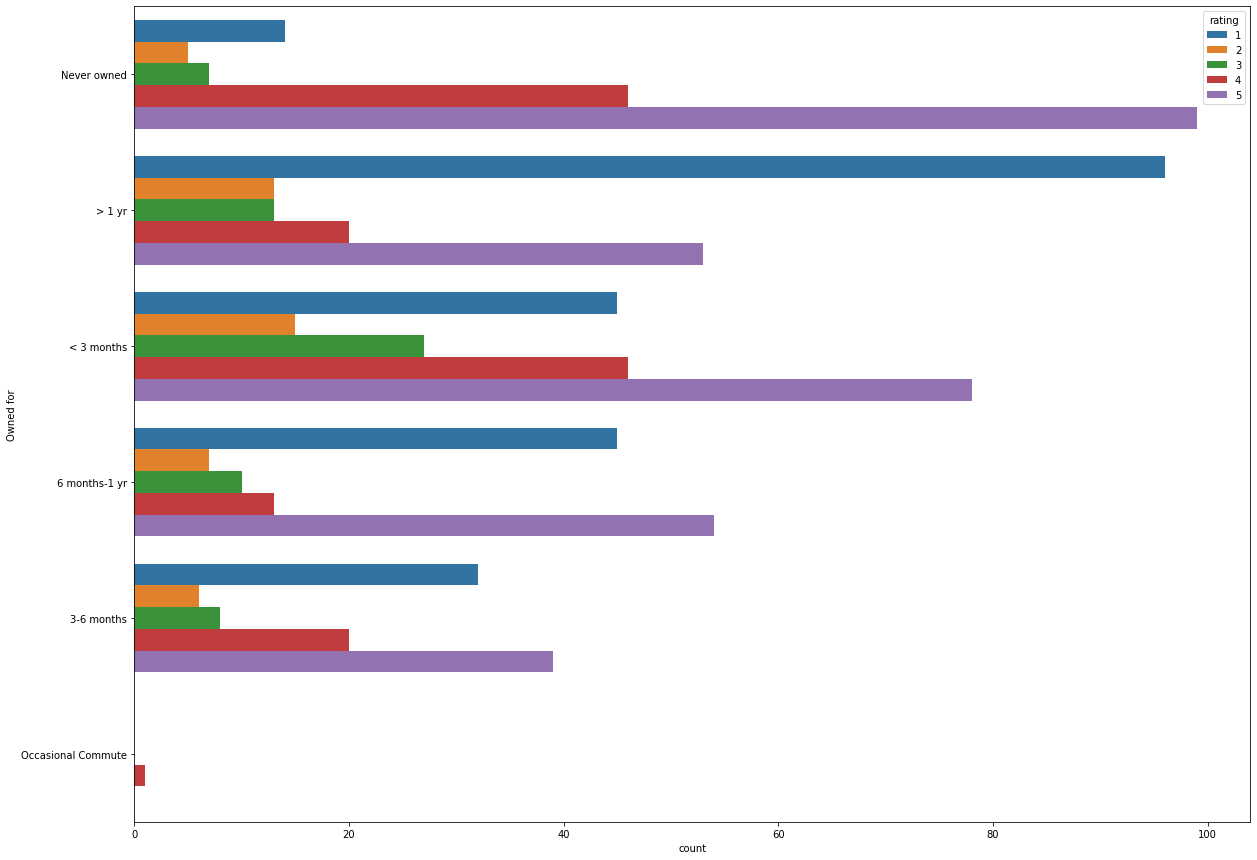

In [15]:
plt.figure(figsize=(20, 15))
sns.countplot(y ='Owned for', data = df, hue='rating')

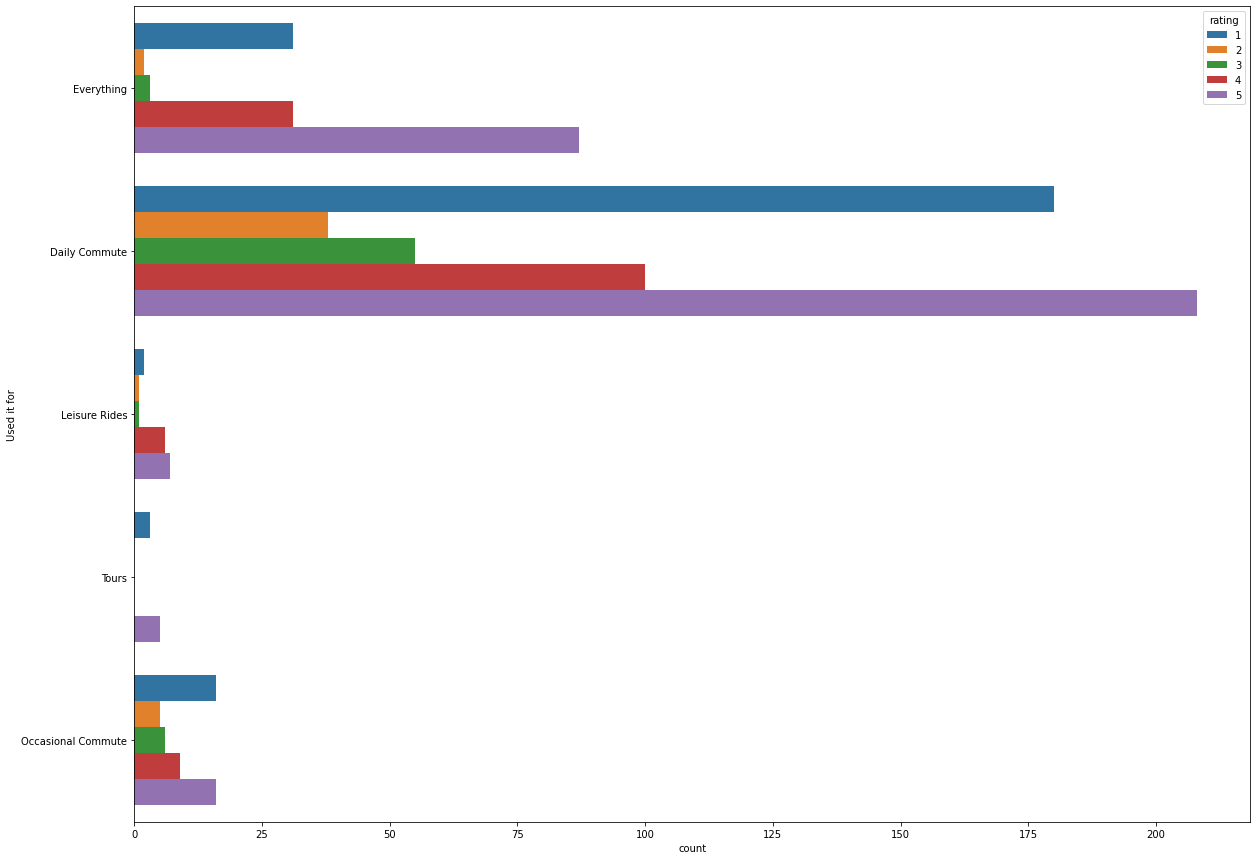

In [16]:
plt.figure(figsize=(20, 15))
sns.countplot(y ='Used it for', data = df, hue='rating')

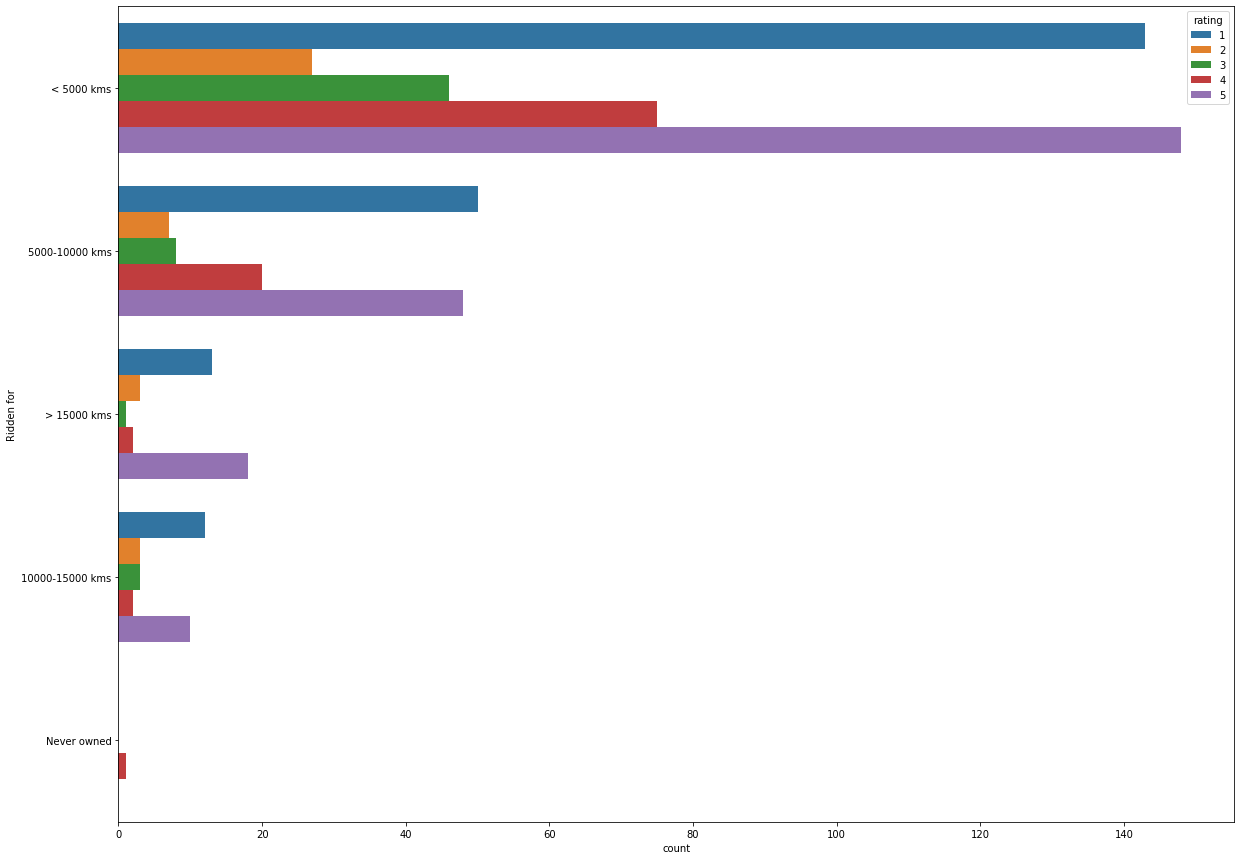

In [17]:
plt.figure(figsize=(20, 15))
sns.countplot(y ='Ridden for', data = df, hue='rating')